In [110]:
import pandas as pd
import numpy as np

# Task 1 Bag of Words and simple Features

# Linear model with non-review based features and L2 regularisation

In [111]:
df = pd.read_csv('data/train.csv')

In [ ]:
df.info()

In [ ]:
df.head()

In [113]:
def dummy(df,col):
    drop = np.unique(df[col])[-1]
    dummy = pd.get_dummies(df[col])
    new_col = []
    for i in dummy.columns:
        new_col.append(col+'_'+str(i))
    dummy.columns = new_col
    df = pd.concat([df, dummy], axis=1)
    df.drop([col, new_col[-1]], inplace=True, axis=1)
    return df

In [114]:
df.columns

Index(['Id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [115]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['designation'].fillna(df['designation'].mode()[0], inplace=True)
df['province'].fillna(df['province'].mode()[0], inplace=True)
df['region_1'].fillna(df['region_1'].mode()[0], inplace=True)
df['region_2'].fillna(df['region_2'].mode()[0], inplace=True)
df['taster_name'].fillna(df['taster_name'].mode()[0], inplace=True)
df['taster_twitter_handle'].fillna(df['taster_twitter_handle'].mode()[0], inplace=True)

In [116]:
df['price'].fillna(df['price'].median(), inplace=True)

In [117]:
cols = [ 'country', 'taster_name', 'variety'] 

In [118]:
empty = []
for col in cols:
    try:
        df = dummy(df,col)
    except:
        empty.append(col)

In [119]:
empty

[]

In [120]:
y = df['points'].values

In [121]:
df.drop(['Id',
'description',
'designation',
'points',
'province',
'region_1',
'region_2',
'taster_twitter_handle',
'title',
'winery'],axis=1,inplace=True)

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

df_scaled1 = pd.DataFrame(df_scaled, columns = df.columns)


In [185]:
df_sub = df.iloc[:,(df_scaled1.var() > 0.02).values]

In [ ]:
(df_scaled1.var() > 0.02).values

In [186]:
df_sub['price'] = df['price']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
X = df_sub.values

In [127]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha = 0.01, normalize = False)
clf.fit(X, y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
clf.score(X,y)

0.23772346398423183

In [129]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [130]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 31)

In [131]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

Text(0, 0.5, 'weights')

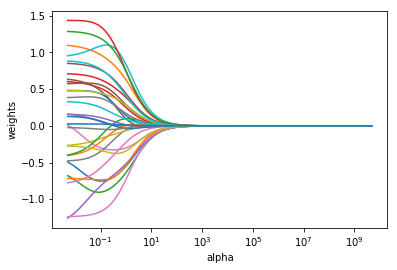

In [132]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [176]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [177]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.020185086292982747

In [178]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

6.9170635285557935

In [179]:
ridge.score(X_test, y_test)

0.24470745847603645

In [198]:
public = pd.read_csv('data/public.csv')

In [213]:
private = pd.read_csv('data/private.csv')

# Predicting the non-review based model on private dataset

In [169]:
private['country'].fillna(private['country'].mode()[0], inplace=True)
private['designation'].fillna(private['designation'].mode()[0], inplace=True)
private['province'].fillna(private['province'].mode()[0], inplace=True)
private['region_1'].fillna(private['region_1'].mode()[0], inplace=True)
private['region_2'].fillna(private['region_2'].mode()[0], inplace=True)
private['taster_name'].fillna(private['taster_name'].mode()[0], inplace=True)
private['taster_twitter_handle'].fillna(private['taster_twitter_handle'].mode()[0], inplace=True)

private['price'].fillna(private['price'].median(), inplace=True)

cols = [ 'country', 'taster_name', 'variety'] 

empty = []
for col in cols:
    try:
        private = dummy(private,col)
    except:
        empty.append(col)

empty


[]

In [171]:
y_private = private['points'].values


In [ ]:
df_sub_private = private[df_sub.columns]

X_private = df_sub_private.values


In [192]:
mean_squared_error(y_private, ridge.predict(X_private))

ridge.score(X_private, y_private)

0.24936179420755233

# Predicting the non-review based model on public dataset

In [200]:
public['country'].fillna(public['country'].mode()[0], inplace=True)
public['designation'].fillna(public['designation'].mode()[0], inplace=True)
public['province'].fillna(public['province'].mode()[0], inplace=True)
public['region_1'].fillna(public['region_1'].mode()[0], inplace=True)
public['region_2'].fillna(public['region_2'].mode()[0], inplace=True)
public['variety'].fillna(public['variety'].mode()[0], inplace=True)
public['taster_name'].fillna(public['taster_name'].mode()[0], inplace=True)
public['taster_twitter_handle'].fillna(public['taster_twitter_handle'].mode()[0], inplace=True)

public['price'].fillna(public['price'].median(), inplace=True)

cols = ['country', 'taster_name', 'variety'] 

empty = []
for col in cols:
    try:
        public = dummy(public,col)
    except:
        empty.append(col)

empty




[]

In [201]:
y_public = public['points'].values


df_sub_public = public[df_sub.columns]

df_sub_public.info()

X_public = df_sub_public.values


mean_squared_error(y_public, ridge.predict(X_public))

ridge.score(X_public, y_public)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 31 columns):
country_Argentina                   20001 non-null uint8
country_Austria                     20001 non-null uint8
country_Chile                       20001 non-null uint8
country_France                      20001 non-null uint8
country_Italy                       20001 non-null uint8
country_Portugal                    20001 non-null uint8
country_Spain                       20001 non-null uint8
country_US                          20001 non-null uint8
taster_name_Anna Lee C. Iijima      20001 non-null uint8
taster_name_Anne Krebiehl MW        20001 non-null uint8
taster_name_Jim Gordon              20001 non-null uint8
taster_name_Joe Czerwinski          20001 non-null uint8
taster_name_Kerin O’Keefe           20001 non-null uint8
taster_name_Matt Kettmann           20001 non-null uint8
taster_name_Michael Schachner       20001 non-null uint8
taster_name_Paul Gregutt            

0.2500127079784289

# linear model using review based features and Count vectoriser and L2 regularisation 

In [33]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [34]:
combi = pd.read_csv('data/train.csv')

In [35]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [ ]:
combi['description'] = np.vectorize(remove_pattern)(combi['description'], "@[\w]*") 

In [ ]:
combi['description'] = combi['description'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
combi['description'] = combi['description'].str.replace('#','')

In [38]:
combi['description'] = combi['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [40]:
tokenized_tweet = combi['description'].apply(lambda x: x.split()) # tokenizing

In [ ]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming


In [168]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['description'] = tokenized_tweet

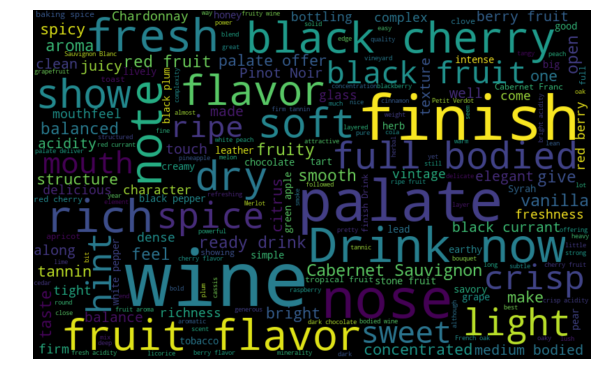

In [43]:
all_words = ' '.join([text for text in combi['description']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [217]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=200, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['description'])
bow.shape


(89970, 200)

In [203]:
bow = np.array(bow.todense())

In [204]:
X_train, X_test , y_train, y_test = train_test_split(bow, y, test_size=0.2, random_state=1)

In [205]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.008737642000038414

In [206]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

5.256016628719822

In [207]:
ridge.score(X_test, y_test)

0.42608158195897544

# Checking accuracy of linear model using review based features, Count vectoriser and L2 regularisation on public dataset

In [218]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

public['description'] = np.vectorize(remove_pattern)(public['description'], "@[\w]*") 

public['description'] = public['description'].str.replace("[^a-zA-Z#]", " ")

public['description'] = public['description'].str.replace('#','')

public['description'] = public['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

tokenized_tweet = public['description'].apply(lambda x: x.split()) # tokenizing

tokenized_tweet.head()

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming
#lemmatized_output = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
public['description'] = tokenized_tweet

all_words = ' '.join([text for text in public['description']])


bow_public = bow_vectorizer.transform(public['description'])
bow.shape


bow_public = np.array(bow_public.todense())

y = public['points']


mean_squared_error(y, ridge.predict(bow_public))

ridge.score(bow_public, y)

0.41728530345424897

# Checking accuracy of linear model using review based features, Count vectoriser and L2 regularisation on private dataset

In [219]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

private['description'] = np.vectorize(remove_pattern)(private['description'], "@[\w]*") 

private['description'] = private['description'].str.replace("[^a-zA-Z#]", " ")

private['description'] = private['description'].str.replace('#','')

private['description'] = private['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

tokenized_tweet = private['description'].apply(lambda x: x.split()) # tokenizing

tokenized_tweet.head()

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming
#lemmatized_output = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
private['description'] = tokenized_tweet

all_words = ' '.join([text for text in private['description']])



bow_private = bow_vectorizer.transform(private['description'])



bow_private = np.array(bow_private.todense())

y = private['points']


mean_squared_error(y, ridge.predict(bow_private))

ridge.score(bow_private, y)

0.42575316972328936

# Combining non review and review based tfidf features 

In [68]:
tfidf = np.array(tfidf.todense())
X.shape, tfidf.shape, type(tfidf), type(X)

((89970, 31), (89970, 200), numpy.ndarray, numpy.ndarray)

In [69]:

X_tfidf = np.hstack((X,tfidf))

X_train, X_test , y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

ridge.score(X_test, y_test)

0.5395942473832831

# Task 3: Custom Word Vectors

# Custom word to vec embeddings using skip-gram model

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [229]:
tokenized_tweet = combi['description'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=50, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)



In [230]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['description']), epochs=20)

(49396884, 61990780)

model_w2v.shape

In [231]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [232]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 50))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 50)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

(89970, 50)

In [236]:
X_train, X_test , y_train, y_test = train_test_split(wordvec_df, combi['points'], test_size=0.2, random_state=1)

In [237]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [238]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

4.208923794471053

In [239]:
ridge.score(X_test, y_test)

0.5404164300815004

# Checking accuracy of custom word to vec embeddings using skip-gram model on private dataset

In [241]:
tokenized_tweet_private = private['description'].apply(lambda x: x.split()) # tokenizing

wordvec_arrays_private = np.zeros((len(tokenized_tweet_private), 50))

for i in range(len(tokenized_tweet_private)):
    wordvec_arrays_private[i,:] = word_vector(tokenized_tweet_private[i], 50)
    
wordvec_df_private = pd.DataFrame(wordvec_arrays_private)
wordvec_df_private.shape    

mean_squared_error(private['points'], ridge.predict(wordvec_df_private))

ridge.score(wordvec_df_private, private['points'])

0.5018984673156571

# Checking accuracy of custom word to vec embeddings using skip-gram model on public dataset

In [242]:
tokenized_tweet_public = public['description'].apply(lambda x: x.split()) # tokenizing

wordvec_arrays_public = np.zeros((len(tokenized_tweet_public), 50))

for i in range(len(tokenized_tweet_public)):
    wordvec_arrays_public[i,:] = word_vector(tokenized_tweet_public[i], 50)
    
wordvec_df_public = pd.DataFrame(wordvec_arrays_public)
wordvec_df_public.shape    

mean_squared_error(public['points'], ridge.predict(wordvec_df_public))

ridge.score(wordvec_df_public, public['points'])

0.4933246314798058

# Combine custom skip gram word2vec and bow features

In [82]:
X_bow_sg_w2v = np.hstack((wordvec_df,bow))

In [83]:
X_bow_sg_w2v

array([[-0.00262551, -0.23499813,  0.2317796 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27572221, -0.10347272,  0.18937457, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03521588, -0.15286143,  0.28467456, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.17225228, -0.19234901,  0.18830725, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16508608, -0.23316762,  0.32500752, ...,  0.        ,
         0.        ,  0.        ],
       [-0.32364449, -0.09797542,  0.10864892, ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
X_train, X_test , y_train, y_test = train_test_split(X_bow_sg_w2v, y, test_size=0.2, random_state=1)

In [85]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [86]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

3.545981161827917

In [87]:
ridge.score(X_test, y_test)

0.6128048972144841

# Task 2 Pre-trained Word Vectors

# Using pre-trained word2vec embeddings created by Google

In [253]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [254]:
def word_vector_pretrained(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [255]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 300))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector_pretrained(tokenized_tweet[i], 300)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

(89970, 300)

In [257]:
X_train, X_test , y_train, y_test = train_test_split(wordvec_df, combi['points'], test_size=0.2, random_state=1)

In [258]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.008737642000038414

In [259]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

5.239015673425837

In [261]:
ridge.score(X_test, y_test)

0.4279379614297319

# Using pre-trained word2vec embeddings on private dataset 

In [262]:
tokenized_tweet_private = private['description'].apply(lambda x: x.split()) # tokenizing

wordvec_arrays_private = np.zeros((len(tokenized_tweet_private), 300))

for i in range(len(tokenized_tweet_private)):
    wordvec_arrays_private[i,:] = word_vector_pretrained(tokenized_tweet_private[i], 300)
    
wordvec_df_private = pd.DataFrame(wordvec_arrays_private)
wordvec_df_private.shape    

mean_squared_error(private['points'], ridge.predict(wordvec_df_private))

ridge.score(wordvec_df_private, private['points'])

0.4846125449904594

# Using pre-trained word2vec embeddings on public dataset 

In [264]:
tokenized_tweet_public = public['description'].apply(lambda x: x.split()) # tokenizing

wordvec_arrays_public = np.zeros((len(tokenized_tweet_public), 300))

for i in range(len(tokenized_tweet_public)):
    wordvec_arrays_public[i,:] = word_vector_pretrained(tokenized_tweet_public[i], 300)
    
wordvec_df_public = pd.DataFrame(wordvec_arrays_public)
wordvec_df_public.shape    

mean_squared_error(public['points'], ridge.predict(wordvec_df_public))

ridge.score(wordvec_df_public, public['points'])

0.4765056668795022

# Combine pretrained word embedding with bag of words features

In [103]:
wordvec_bow = np.hstack((wordvec_df,bow))

In [107]:
X_train, X_test , y_train, y_test = train_test_split(wordvec_bow, y, test_size=0.2, random_state=1)

In [108]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.01155064850041579

In [109]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))
ridge.score(X_test, y_test)

0.5598097292977211